In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Lecture et affichage de la base

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/cereal.csv")
df=pd.DataFrame(data)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


 Data Cleaning & Pre-Processing

In [ ]:
df.shape

(77, 16)

In [ ]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [ ]:
df.nunique()  #checking for the unique values in each attribute.

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


we have 3 attributes of type object and the rest is float and integer. There's no null values too.

In [ ]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
72    False
73    False
74    False
75    False
76    False
Length: 77, dtype: bool

In [ ]:
df['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

EDA

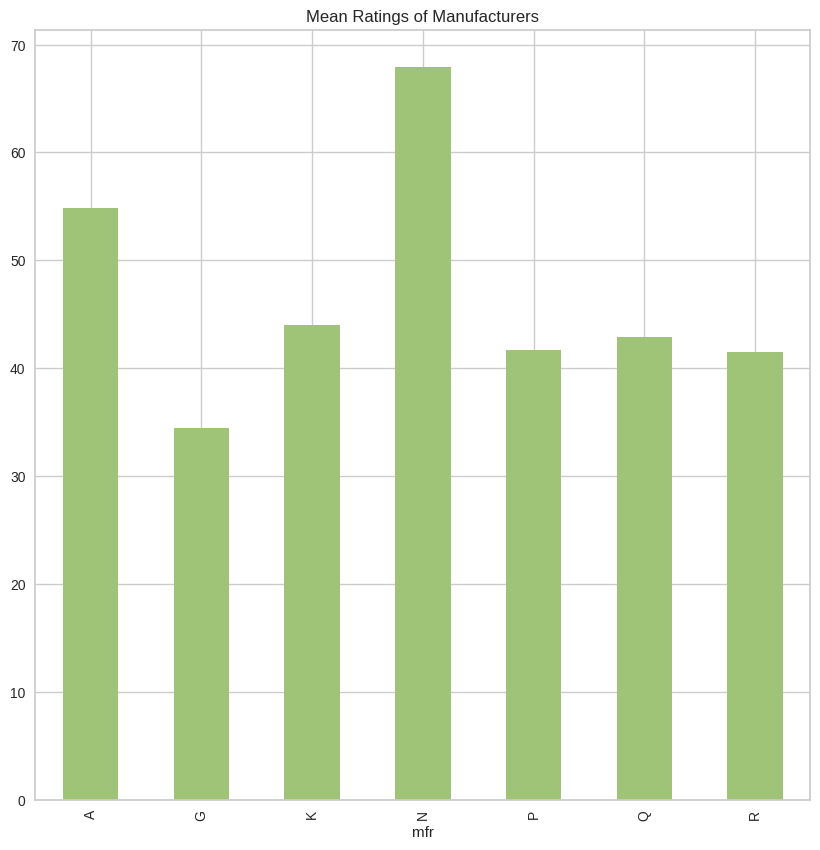

In [ ]:
#We visualize the ratings among different manufacturers:
plt.figure(figsize=(10,10))
df.groupby('mfr')['rating'].mean().plot.bar(color='g')
plt.title('Mean Ratings of Manufacturers')
plt.show()

We have,

A = American Home Food Products

G = General Mills

K = Kelloggs

N = Nabisco

P = Post

Q = Quaker Oats

R = Ralston Purina

Nabisco has the highest rating while General Mills the lowest. On average, the ratings among manufacturers follows a uniform distribution.

<ipython-input-38-e1aa370fc566>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


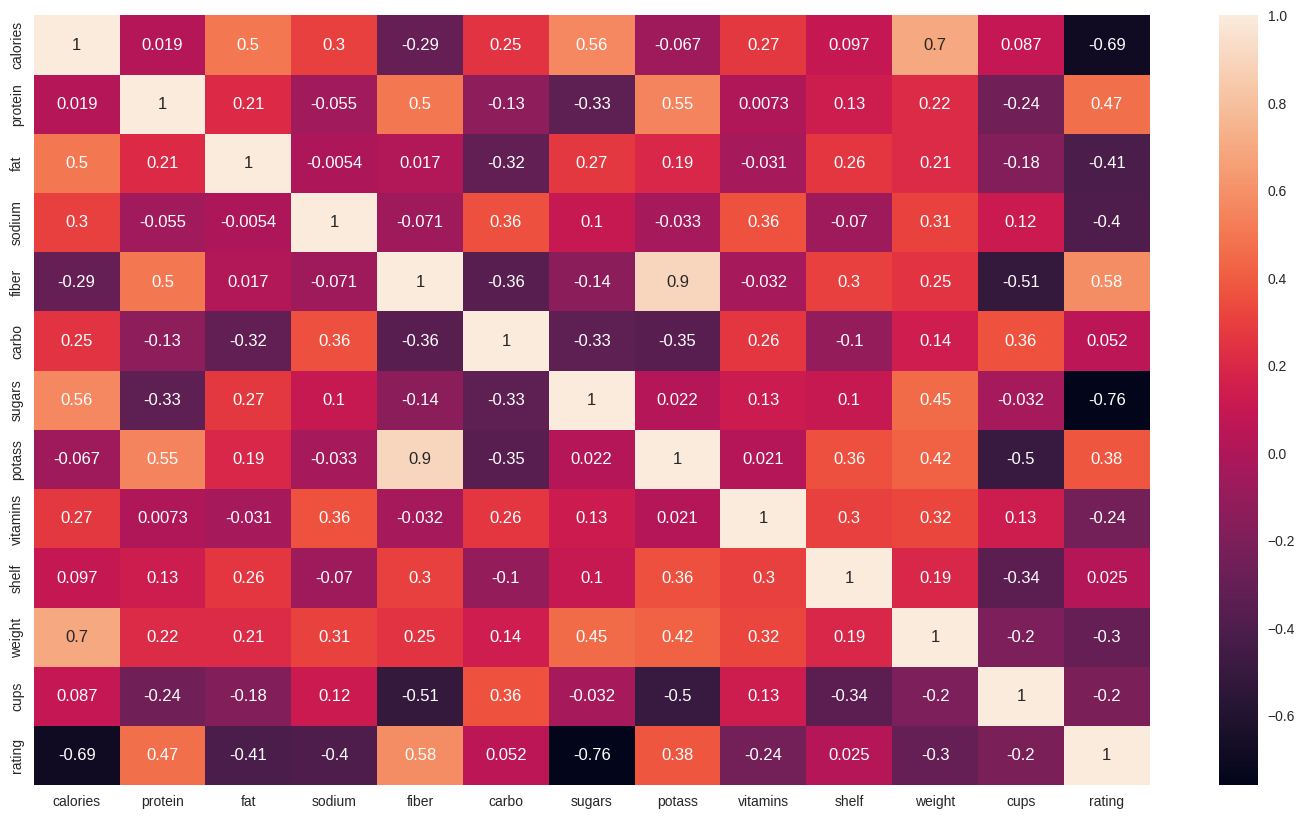

In [ ]:
corr_mat=df.corr()
mat=corr_mat.values
plt.figure(figsize=(18,10))
sn.heatmap(corr_mat, annot=True)
plt.show()

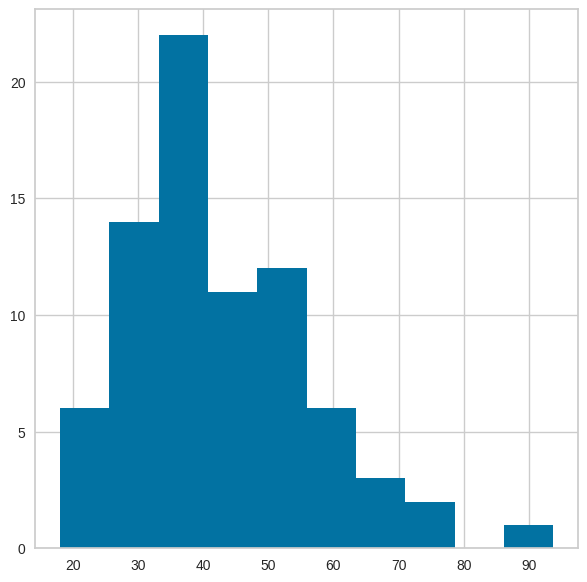

In [ ]:
#Checking the distribution of ratings
plt.figure(figsize=(7,7))
plt.hist(df['rating'])
plt.show()

Preque une distribution normale

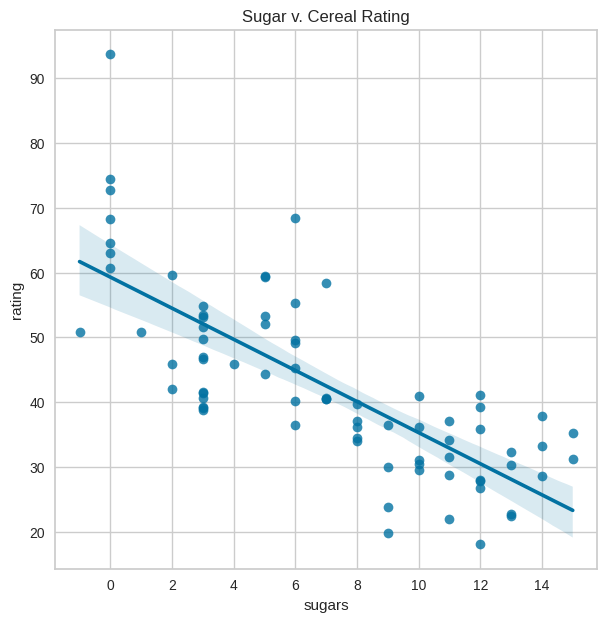

In [ ]:
#We visualize the relation between Sugar & Rating
y_rating=df["rating"]
x_sugar=df["sugars"]
plt.figure(figsize=(7,7))
sn.regplot(x=x_sugar,y=y_rating) #regression best fit line command
plt.title('Sugar v. Cereal Rating')
plt.show()

As seen from above, the rating falls on average as sugar amount increases in the cereal. This shows that consumers value the 'healthy' aspect of cereals and would ideally rate high those cereals that have minimum sugar.

Encodage des types

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Initialisez l'encodeur OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Effectuez l'encodage One-Hot pour la colonne "type"
encoded_data = ohe.fit_transform(df[['type']])

# Créez un DataFrame avec les colonnes "typeA" et "typeB"
t = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['type']))

# Affichez le DataFrame avec les colonnes "typeA" et "typeB"
print(t)

    type_C  type_H
0      1.0     0.0
1      1.0     0.0
2      1.0     0.0
3      1.0     0.0
4      1.0     0.0
..     ...     ...
72     1.0     0.0
73     1.0     0.0
74     1.0     0.0
75     1.0     0.0
76     1.0     0.0

[77 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_data = ohe.fit_transform(df[['mfr']])

# Créez un DataFrame avec les colonnes correspondant à chaque attribut de "mfr"
m = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['mfr']))

# Affichez le DataFrame avec les colonnes encodées
print(m)

    mfr_A  mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R
0     0.0    0.0    0.0    1.0    0.0    0.0    0.0
1     0.0    0.0    0.0    0.0    0.0    1.0    0.0
2     0.0    0.0    1.0    0.0    0.0    0.0    0.0
3     0.0    0.0    1.0    0.0    0.0    0.0    0.0
4     0.0    0.0    0.0    0.0    0.0    0.0    1.0
..    ...    ...    ...    ...    ...    ...    ...
72    0.0    1.0    0.0    0.0    0.0    0.0    0.0
73    0.0    1.0    0.0    0.0    0.0    0.0    0.0
74    0.0    0.0    0.0    0.0    0.0    0.0    1.0
75    0.0    1.0    0.0    0.0    0.0    0.0    0.0
76    0.0    1.0    0.0    0.0    0.0    0.0    0.0

[77 rows x 7 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
final_df = pd.concat([df, m, t], axis=1)
final_df = final_df.drop(columns=['type', 'mfr'])
dff=pd.DataFrame(final_df)
dff

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,...,68.402973,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,...,33.983679,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,...,59.425505,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,...,93.704912,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Almond Delight,110,2,2,200,1.0,14.0,8,-1,25,...,34.384843,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3,60,25,...,39.106174,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
73,Trix,110,1,1,140,0.0,13.0,12,25,25,...,27.753301,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,Wheat Chex,100,3,1,230,3.0,17.0,3,115,25,...,49.787445,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
75,Wheaties,100,3,1,200,3.0,17.0,3,110,25,...,51.592193,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


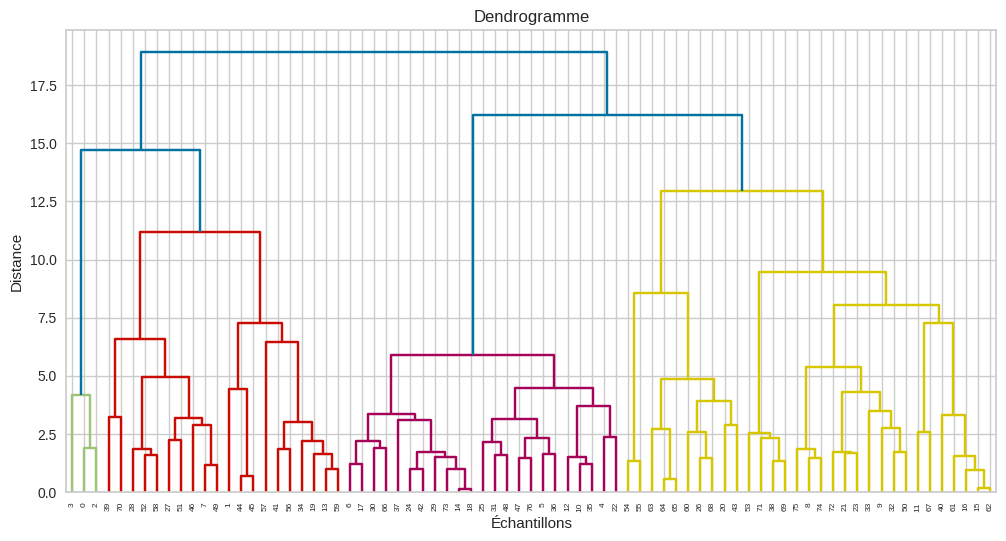

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques que nous avons standardisées
numeric_cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

# Appliquer la standardisation z-score aux colonnes numériques
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Réaliser une analyse de clustering hiérarchique sur les données standardisées
Z = linkage(df[numeric_cols], method='ward')

# Créer le dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrogramme")
plt.xlabel("Échantillons")
plt.ylabel("Distance")
plt.show()




In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
df['cluster'] = agg_clustering.fit_predict(df[numeric_cols])

# Calculer l'indice de silhouette
silhouette_avg = silhouette_score(df[numeric_cols], df['cluster'])
print(f"Silhouette Score : {silhouette_avg}")

Silhouette Score : 0.215571259092983
